## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
steam_row = pd.read_csv(r'C:\Users\82103\sih\web_crawling\merge_dataset\raw_merge.csv', sep='\t', encoding='utf-8')
steam_tag = pd.read_csv(r'C:\Users\82103\sih\web_crawling\merge_dataset\tag_merge.csv', sep='\t', encoding='utf-8')

steam_row.head()

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,0,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive


In [3]:
steam_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46252 entries, 0 to 46251
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appid               46252 non-null  int64  
 1   24_Hour_Peak        46252 non-null  int64  
 2   All_time_peak       46252 non-null  int64  
 3   positive            46252 non-null  int64  
 4   negative            46252 non-null  int64  
 5   average_forever     46252 non-null  int64  
 6   average_2weeks      46252 non-null  int64  
 7   median_forever      46252 non-null  int64  
 8   median_2weeks       46252 non-null  int64  
 9   price               46252 non-null  float64
 10  initialprice        46252 non-null  float64
 11  genre               46252 non-null  object 
 12  num_lang            46252 non-null  int64  
 13  required_age        46252 non-null  float64
 14  is_free             46252 non-null  int64  
 15  controller_support  46252 non-null  int64  
 16  dlc 

In [4]:
steam_row.describe()

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,dlc,metacritic,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,days_after_release
count,4.625200e+04,46252.000000,4.625200e+04,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,...,46252.000000,1247.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000
mean,1.345554e+06,68.137118,6.508497e+02,749.455569,132.672295,109.782993,7.580429,97.879767,8.404004,6.958805,...,0.478985,74.289495,0.026961,0.991049,0.179646,0.119454,1.290150,621.876567,20.804008,954.674933
std,4.408797e+05,2705.008916,1.324747e+04,10388.907605,2057.176731,1337.555910,137.046019,1365.108579,151.662843,11.092962,...,4.621223,9.463306,0.161971,0.094186,0.383897,0.324326,0.629093,9089.433998,173.362171,529.189863
min,1.313000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000
25%,9.872250e+05,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,...,0.000000,69.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,496.000000
50%,1.321115e+06,0.000000,0.000000e+00,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.990000,...,0.000000,76.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,898.000000
75%,1.695632e+06,0.000000,4.000000e+00,45.000000,12.000000,0.000000,0.000000,0.000000,0.000000,9.990000,...,0.000000,81.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,19.000000,1394.000000
max,2.253880e+06,513618.000000,1.324761e+06,798795.000000,143347.000000,178059.000000,11043.000000,178106.000000,11043.000000,999.000000,...,461.000000,97.000000,1.000000,1.000000,1.000000,1.000000,3.000000,749078.000000,5394.000000,1964.000000


In [5]:
steam_row.shape

(46252, 28)

In [6]:
# 결측치가 있는 행만 출력
genre_missing_rows = steam_row[steam_row['genre'].isnull()]

# 결과 출력
print(genre_missing_rows)
genre_missing_rows['genre']

Empty DataFrame
Columns: [appid, 24_Hour_Peak, All_time_peak, positive, negative, average_forever, average_2weeks, median_forever, median_2weeks, price, initialprice, genre, num_lang, required_age, is_free, controller_support, dlc, metacritic, metacritic_tf, windows, mac, linux, platforms_num, recommendations, achievements, new_date, days_after_release, Review]
Index: []

[0 rows x 28 columns]


Series([], Name: genre, dtype: object)

In [7]:

# 결측치를 핫덱 기법으로 채우기
imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['genre', 'is_free']
steam_row[columns_to_impute] = imputer.fit_transform(steam_row[columns_to_impute])

# 결과 확인
print(steam_row[columns_to_impute].isnull().sum())  # 결측치 개수 출력

genre      0
is_free    0
dtype: int64


In [8]:
steam_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46252 entries, 0 to 46251
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appid               46252 non-null  int64  
 1   24_Hour_Peak        46252 non-null  int64  
 2   All_time_peak       46252 non-null  int64  
 3   positive            46252 non-null  int64  
 4   negative            46252 non-null  int64  
 5   average_forever     46252 non-null  int64  
 6   average_2weeks      46252 non-null  int64  
 7   median_forever      46252 non-null  int64  
 8   median_2weeks       46252 non-null  int64  
 9   price               46252 non-null  float64
 10  initialprice        46252 non-null  float64
 11  genre               46252 non-null  object 
 12  num_lang            46252 non-null  int64  
 13  required_age        46252 non-null  float64
 14  is_free             46252 non-null  int64  
 15  controller_support  46252 non-null  int64  
 16  dlc 

In [9]:
# metacritic_tf가 있으므로 metacritic컬럼은 삭제
steam_row = steam_row.drop('metacritic', axis=1)

In [10]:
steam_row.isnull().sum()

appid                 0
24_Hour_Peak          0
All_time_peak         0
positive              0
negative              0
average_forever       0
average_2weeks        0
median_forever        0
median_2weeks         0
price                 0
initialprice          0
genre                 0
num_lang              0
required_age          0
is_free               0
controller_support    0
dlc                   0
metacritic_tf         0
windows               0
mac                   0
linux                 0
platforms_num         0
recommendations       0
achievements          0
new_date              0
days_after_release    0
Review                0
dtype: int64

In [11]:
# windows, mac, linux, platforms_num 컬럼의 결측치를 0으로 대체
steam_row[['windows','mac','linux','platforms_num']] = steam_row[['windows','mac','linux','platforms_num']].fillna(0)

In [12]:
steam_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46252 entries, 0 to 46251
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appid               46252 non-null  int64  
 1   24_Hour_Peak        46252 non-null  int64  
 2   All_time_peak       46252 non-null  int64  
 3   positive            46252 non-null  int64  
 4   negative            46252 non-null  int64  
 5   average_forever     46252 non-null  int64  
 6   average_2weeks      46252 non-null  int64  
 7   median_forever      46252 non-null  int64  
 8   median_2weeks       46252 non-null  int64  
 9   price               46252 non-null  float64
 10  initialprice        46252 non-null  float64
 11  genre               46252 non-null  object 
 12  num_lang            46252 non-null  int64  
 13  required_age        46252 non-null  float64
 14  is_free             46252 non-null  int64  
 15  controller_support  46252 non-null  int64  
 16  dlc 

In [13]:
steam_row

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,0,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,0,0,14.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-12-02,168,Negative
46248,2098860,0,0,0,11,0,0,0,0,9.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-08-09,283,Negative
46249,2154770,814,1176,0,0,0,0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01,169,Very Negative
46250,1915410,0,1,0,16,0,0,0,0,2.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-04-26,388,Negative


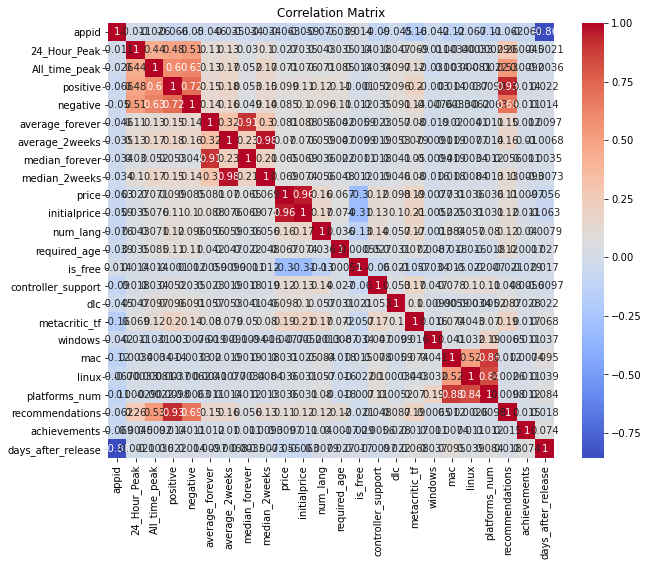

In [14]:
# 상관관계 계산
corr_matrix = steam_row.corr()

# 그래프 출력
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
steam_row

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,0,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,0,0,14.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-12-02,168,Negative
46248,2098860,0,0,0,11,0,0,0,0,9.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-08-09,283,Negative
46249,2154770,814,1176,0,0,0,0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01,169,Very Negative
46250,1915410,0,1,0,16,0,0,0,0,2.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-04-26,388,Negative


In [16]:
# positive와 negative 컬럼을 없애준다.
steam_row.drop(['positive', 'negative'], axis=1, inplace=True)

In [17]:
steam_row['Review'].unique()

array(['Overwhelmingly Positive', 'Very Positive', 'Positive',
       'Mostly Positive', 'Mixed', 'No user reviews', '8 user reviews',
       '7 user reviews', '4 user reviews', '9 user reviews',
       '5 user reviews', '6 user reviews', '2 user reviews',
       '1 user reviews', '3 user reviews', 'Mostly Negative', 'Negative',
       'Very Negative', 'Overwhelmingly Negative'], dtype=object)

In [18]:
# review컬럼의 값들을 4개로 분류
No_list=['No user reviews','8 user reviews','7 user reviews','4 user reviews','9 user reviews','5 user reviews','6 user reviews','2 user reviews','3 user reviews','1 user reviews','None']
positive_list=['Overwhelmingly Positive','Very Positive','Positive','Mostly Positive']
negative_list=['Negative','Very Negative','Overwhelmingly Negative','Mostly Negative']
Mixed = 'Mixed'

steam_row.Review.replace(No_list,"No_interest",inplace=True)
steam_row.Review.replace(positive_list,"Positive",inplace=True)
steam_row.Review.replace(negative_list,"Negative",inplace=True)
steam_row.Review.replace(Mixed, 'Mixed', inplace=True)

In [19]:
# Review컬럼의 값들에 대한 상관관계를 알아보기 위해 원핫인코딩을 함.
# 'Positive', 'Negative', 'No_interest'에 원핫인코딩 진행

label_enc = LabelEncoder()
label_enc.fit(steam_row['Review'])
label_items = label_enc.transform(steam_row['Review'])
print("Label Encoder:",label_items)
oh_enc = OneHotEncoder() # 2D --> 2D
oh_label_items = label_items.reshape(-1,1) # 1D라벨인코더 -> 2D
oh_encoding = oh_enc.fit_transform(oh_label_items).toarray()



# 인코딩된 값들을 steam_row에 추가
encoded_columns = ['Mixed', 'Negative', 'No_interest','Positive']
encoded_df = pd.DataFrame(oh_encoding, columns=encoded_columns)
steam_row = pd.concat([steam_row, encoded_df], axis=1)


Label Encoder: [3 3 3 ... 1 1 1]


In [20]:
# nega = 1, posi = 3, 
steam_row

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,platforms_num,recommendations,achievements,new_date,days_after_release,Review,Mixed,Negative,No_interest,Positive
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,3.0,134967.0,0.0,2018-10-17,1675,Positive,0.0,0.0,0.0,1.0
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,2.0,222889.0,146.0,2018-12-18,1613,Positive,0.0,0.0,0.0,1.0
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,3.0,66397.0,32.0,2018-01-25,1940,Positive,0.0,0.0,0.0,1.0
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,3.0,113184.0,121.0,2018-08-06,1747,Positive,0.0,0.0,0.0,1.0
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,2.0,208334.0,17.0,2018-01-24,1941,Positive,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,1.0,0.0,0.0,2022-12-02,168,Negative,0.0,1.0,0.0,0.0
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,1.0,0.0,0.0,2022-08-09,283,Negative,0.0,1.0,0.0,0.0
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0.0,0.0,0.0,2022-12-01,169,Negative,0.0,1.0,0.0,0.0
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,1.0,0.0,0.0,2022-04-26,388,Negative,0.0,1.0,0.0,0.0


In [22]:
steam_row.loc[steam_row['Review'] == 'Mixed', ['Review', 'Mixed']]

,Review,Mixed
359,Mixed,1.0
708,Mixed,1.0
926,Mixed,1.0
1020,Mixed,1.0
1149,Mixed,1.0
...,...,...
45860,Mixed,1.0
45890,Mixed,1.0
45915,Mixed,1.0
45978,Mixed,1.0


In [23]:
# 'genre' 열의 독립적인 값 추출
# genre 컬럼의 개수 출력
genre_list = steam_row['genre'].str.split(', ').explode().unique().tolist()
len(genre_list)


35

In [24]:
genre_list

['Indie',
 'Simulation',
 'Strategy',
 'Action',
 'Adventure',
 'RPG',
 'Early Access',
 'Casual',
 'Free to Play',
 'Sports',
 'Racing',
 'Massively Multiplayer',
 'N',
 'Violent',
 'Gore',
 'Sexual Content',
 'Animation & Modeling',
 'Design & Illustration',
 'Education',
 'Software Training',
 'Utilities',
 'Web Publishing',
 'Video Production',
 'Nudity',
 'Accounting',
 'Audio Production',
 'Photo Editing',
 'Game Development',
 'Action Games',
 'Movie',
 'Documentary',
 'Episodic',
 'Short',
 'Tutorial',
 '360 V']

In [25]:
steam_row['genre']

0        Indie, Simulation, Strategy
1                           Strategy
2           Action, Adventure, Indie
3           Action, Adventure, Indie
4                   Adventure, Indie
                    ...             
46247               Adventure, Indie
46248              Adventure, Casual
46249                              N
46250                  Action, Indie
46251           Simulation, Strategy
Name: genre, Length: 46252, dtype: object

In [26]:
# 'genre' 열의 유니크한 값을 구분자(,)로 분리하여 리스트로 변환
genres = steam_row['genre'].str.split(', ')

# 유니크한 장르 값을 추출하여 새로운 열로 추가 (원핫인코딩)
for genre in set([item for sublist in genres for item in sublist]):
    steam_row[genre] = genres.apply(lambda x: int(genre in x))

steam_row


,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,Tutorial,Game Development,RPG,Software Training,Education,360 V,Animation & Modeling,Sports,Early Access,Indie
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,0,0,0,0,0,0,0,0,0,1
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,0,0,0,0,0,0,0,0,0,0
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,0,0,0,1
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,0,0,0,1
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,0,0,0,0,0,0,0,0,0,1
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,0,0,0,0,0,0,0,0,0,0
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0,0,0,0,0,0,0,0,0,0
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,0,0,0,0,0,0,0,0,0,1


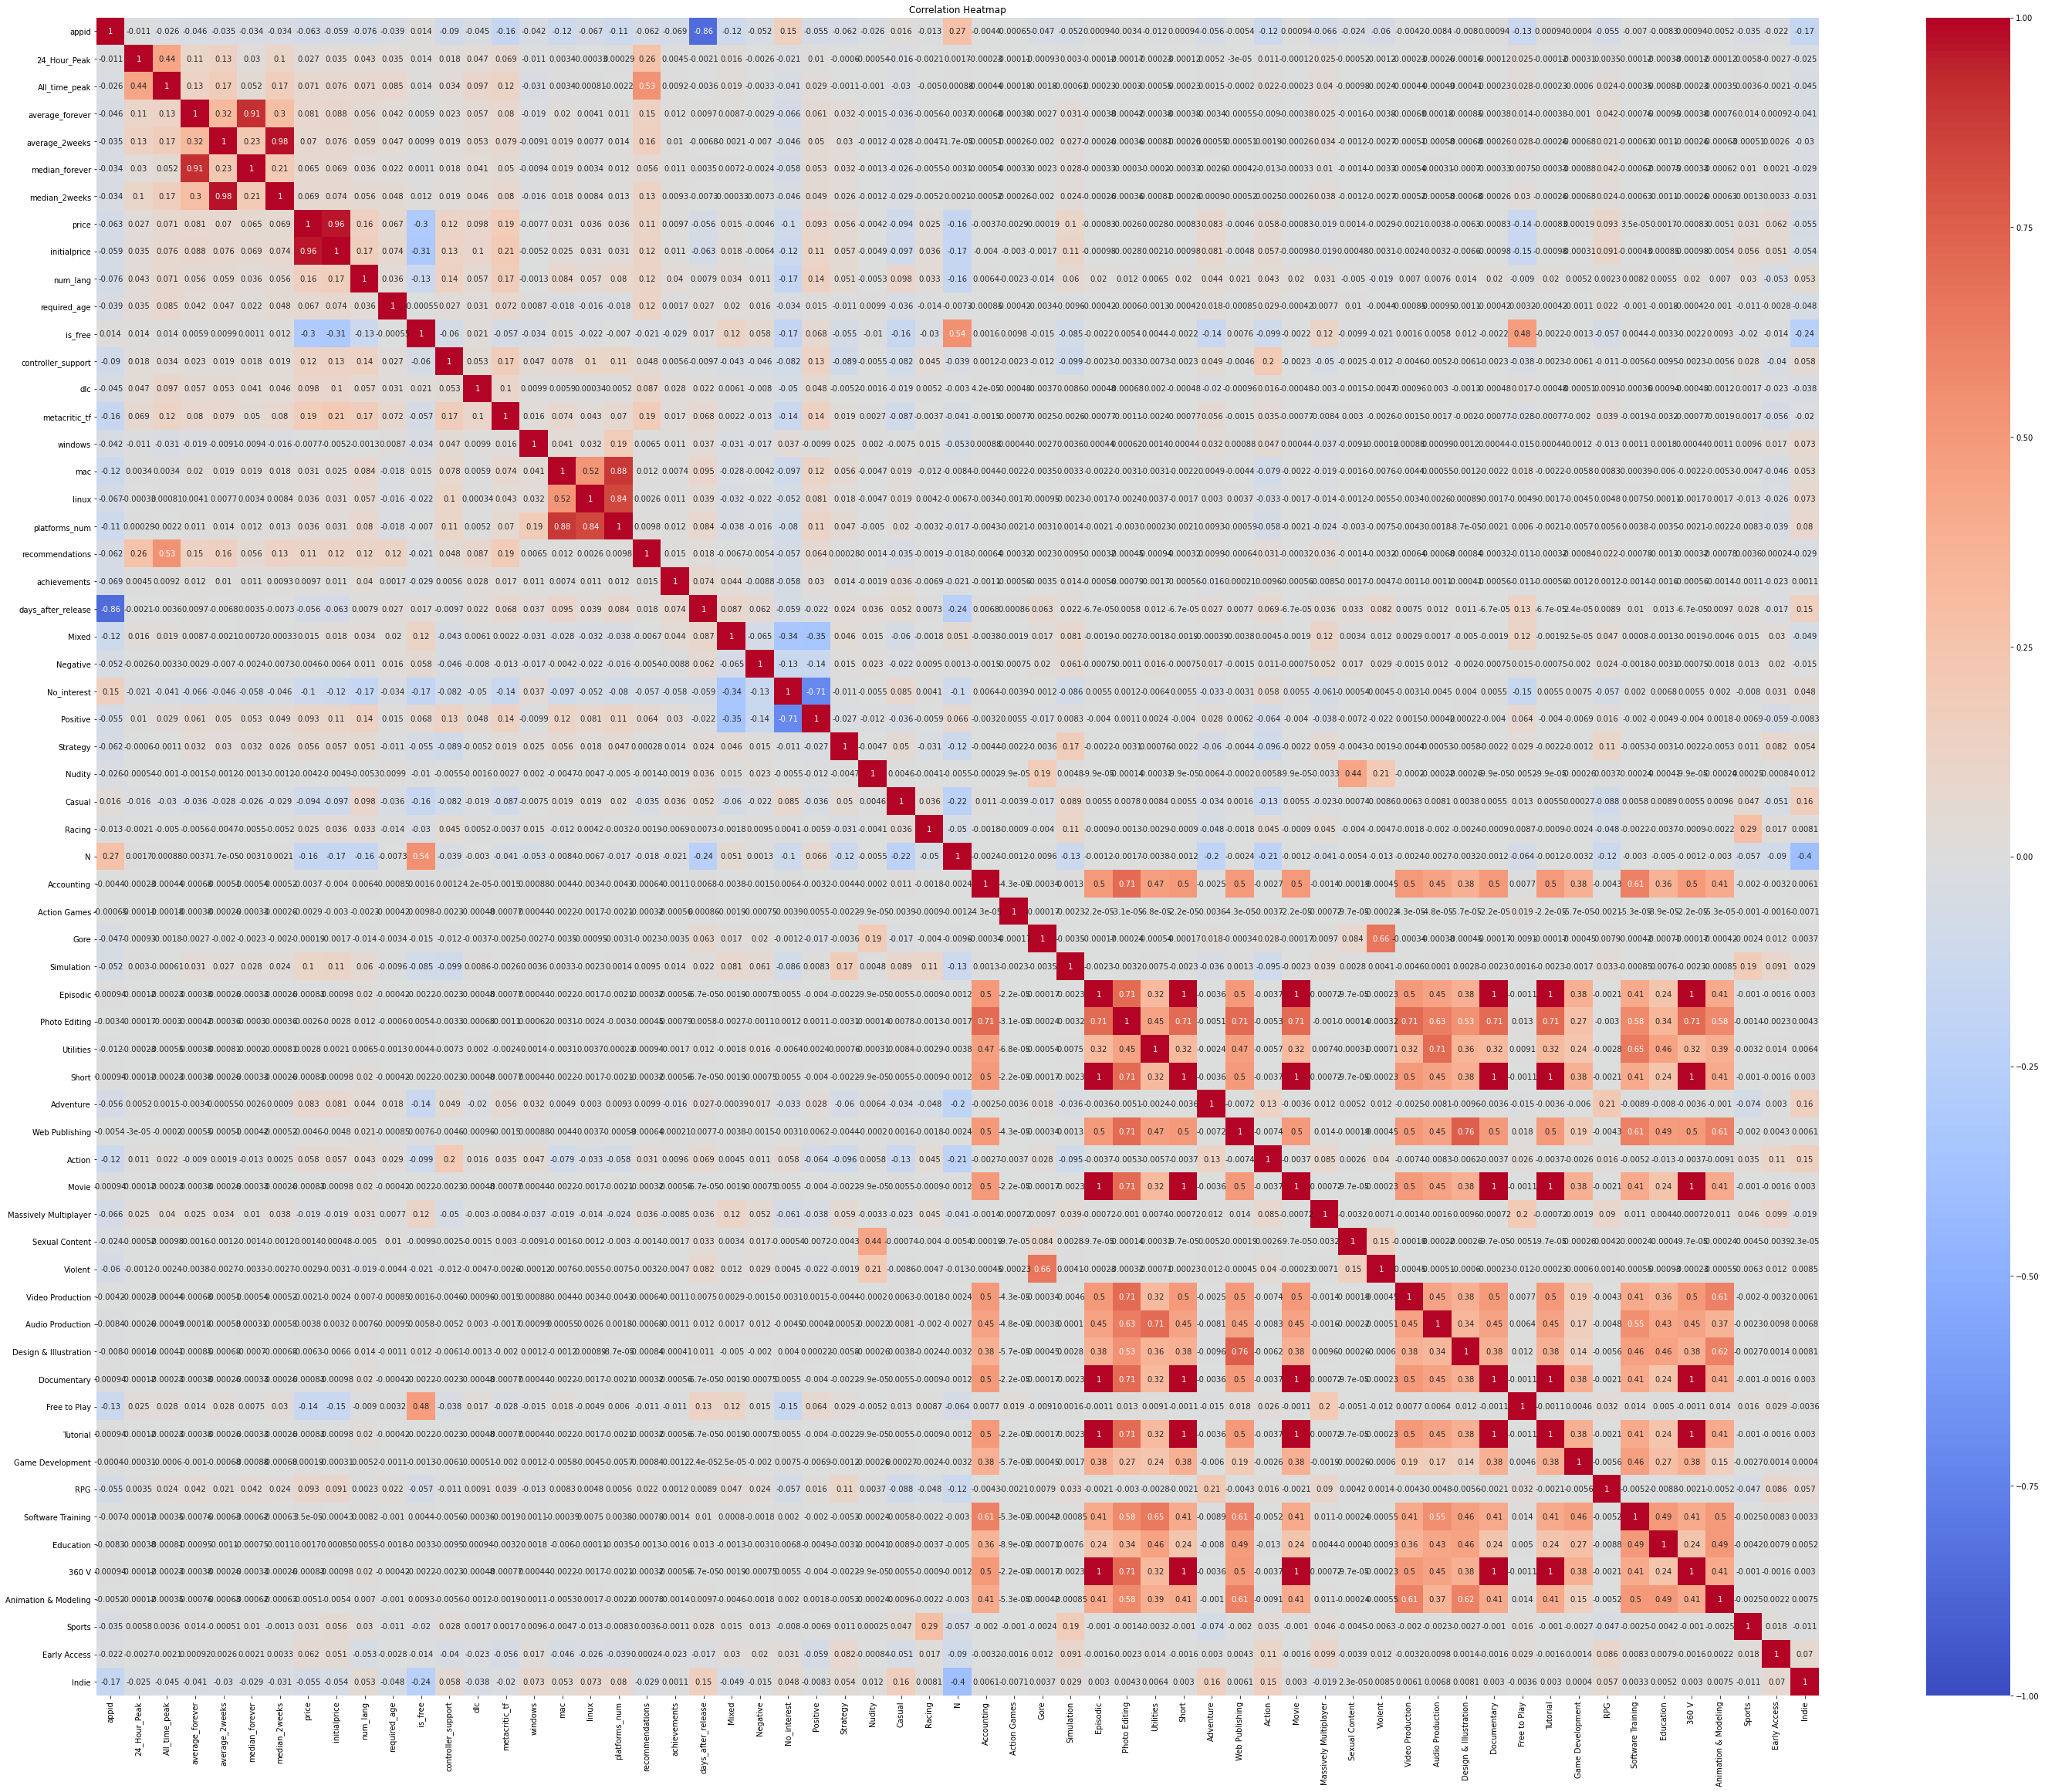

In [28]:
corr_matrix = steam_row.corr()

# 히트맵 생성
plt.figure(figsize=(50, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()